<a href="https://www.kaggle.com/code/mustafacihadgoktepe/breast-cancer-support-vector-classification?scriptVersionId=140567949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Breast cancer is a critical healthcare concern, and early detection plays a pivotal role in improving patient outcomes. In this notebook, we delve into the world of machine learning to build a robust model for classifying breast cancer tumors as either benign or malignant.

The dataset we'll be working with contains a wealth of information about breast cancer tumors, including various features extracted from medical images. By harnessing the power of machine learning, we aim to create a model that can assist medical professionals in making accurate and timely diagnoses.

**Key Objectives:**

- Explore and preprocess the dataset to ensure it's suitable for machine learning.
- Visualize and understand the data's characteristics.
- Build a classification model using various algorithms, including Decision Trees, Logistic Regression, Support Vector Machines, Random Forest, k-Nearest Neighbors, and more.
- Evaluate the models using metrics like accuracy, precision, recall, and F1-score.
- Perform hyperparameter tuning to optimize model performance.
- Visualize results and present key findings.

Through this analysis, we hope to develop a reliable breast cancer classification model that can contribute to the early detection and treatment of this disease. Let's get started by exploring the data and building our machine learning models.

## Data Loading and Initial Exploration

In this section, we begin our analysis by loading the dataset and gaining an initial understanding of its structure and contents. We'll perform the following steps:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data = data.drop(labels=['Unnamed: 32','id'], axis = 1)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Data Visualization and Comparison of Means

In this section, we dive deeper into the breast cancer dataset by visualizing key aspects and comparing means of various features. Here are the steps we follow:

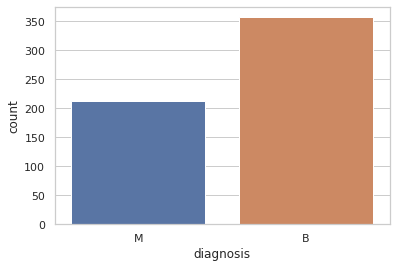

In [6]:
sns.set(style="whitegrid")
sns.countplot(x='diagnosis', data=data);

We group the dataset by the 'diagnosis' column and calculate the mean values for all other numerical features. This step helps us compare the average values of various features between benign and malignant cases.

In [7]:
grouped_data = data.groupby('diagnosis').mean()
grouped_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


To visualize and compare the means of different features for benign and malignant cases, we create a grid of bar plots. Each bar plot represents a feature, and the bars show the mean values for both diagnosis categories (B and M).

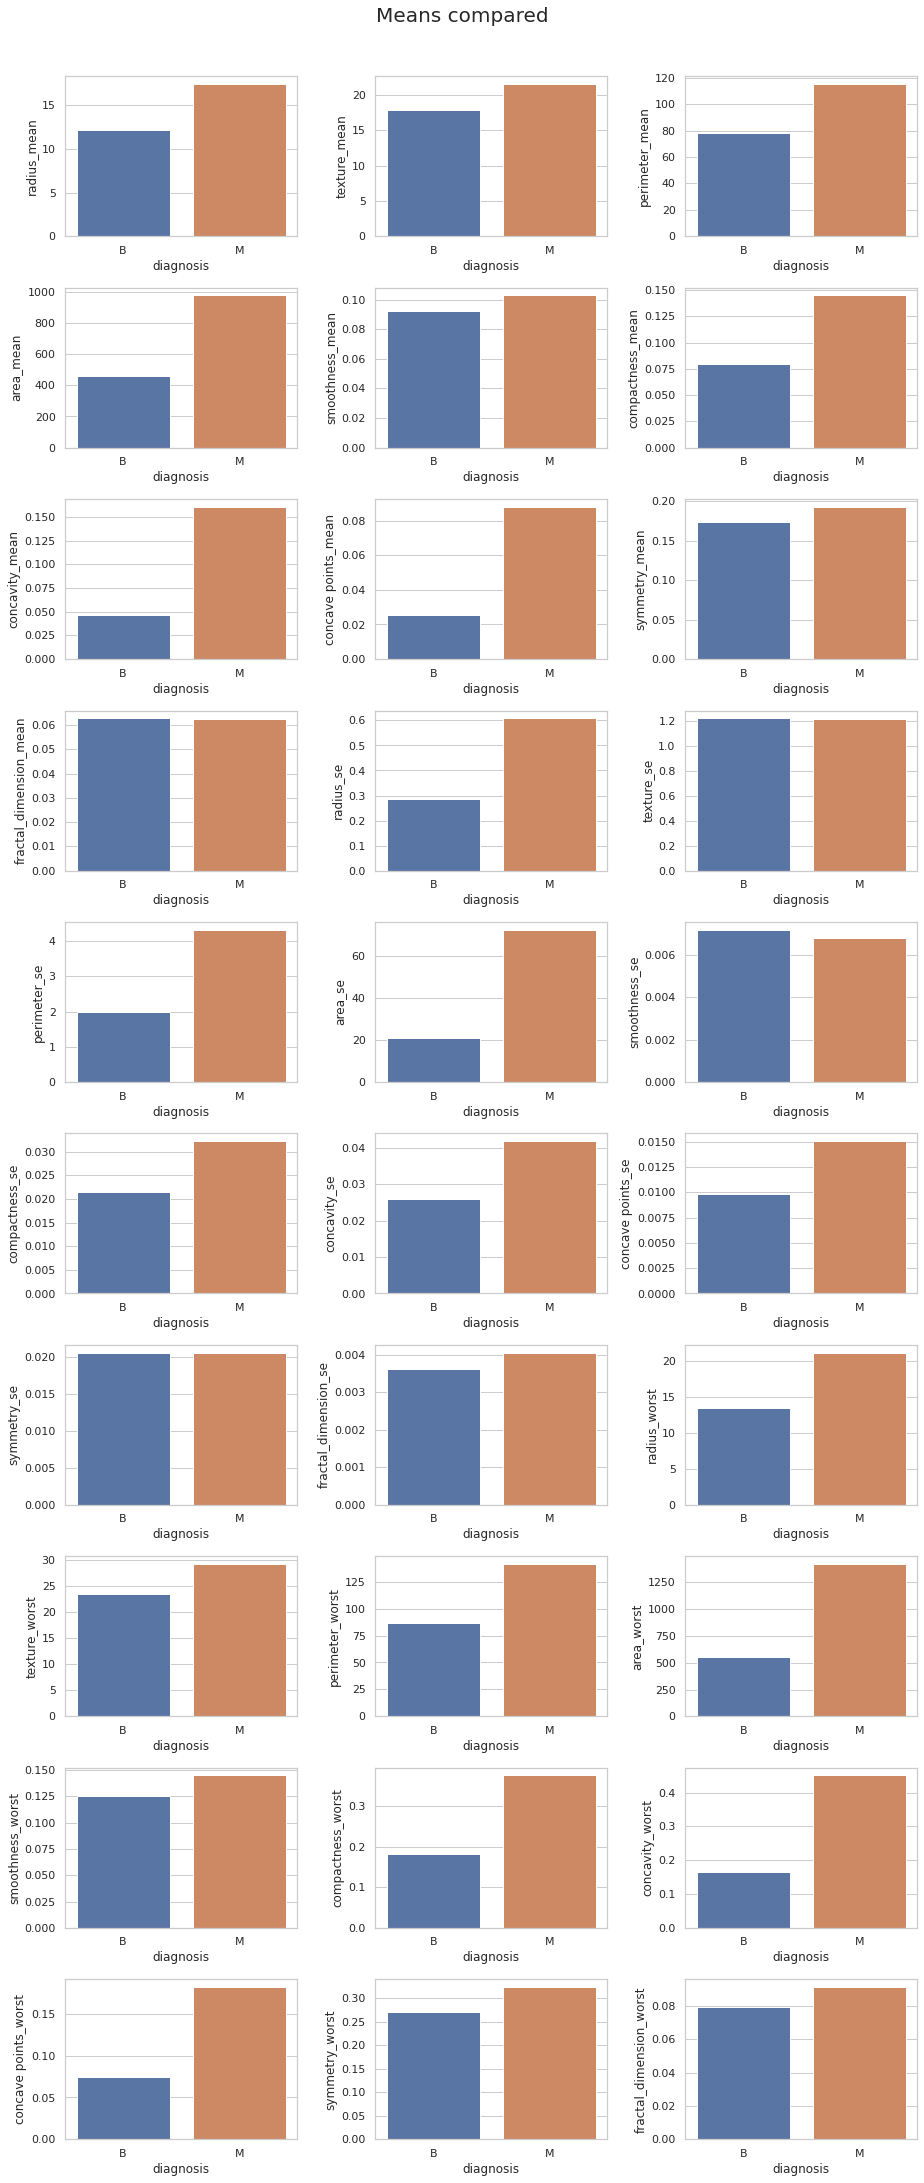

In [8]:
fig, ax = plt.subplots(10,3,figsize=(13,30), tight_layout=True)
for i, col in enumerate(grouped_data):
    sns.barplot(x=grouped_data.index, y=col, data=grouped_data, ax=ax[i//3, i%3]);
fig.suptitle('Means compared', fontsize=20, y=1.01);

## Feature Scaling and Label Encoding

In this section, we prepare the data for machine learning by applying feature scaling and label encoding. These preprocessing steps are essential for ensuring that our data is in a suitable format for training and evaluating machine learning models.

### Feature Scaling

**Min-Max Scaling**: To ensure that all numerical features have the same scale, we perform min-max scaling on the feature values. This technique scales the features to a specific range (usually between 0 and 1), preserving their relative relationships while eliminating scale-related issues.

### Label Encoding

Our target variable, 'diagnosis,' contains categorical values ('B' for benign and 'M' for malignant). Many machine learning algorithms require numerical labels rather than categorical strings. To address this, we apply label encoding to convert 'diagnosis' into numerical values.

In [9]:
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import LabelEncoder

X = data.drop('diagnosis', axis=1)
y = pd.DataFrame(data['diagnosis'])

X_scaled = minmax_scaling(X, columns=X.columns)

label_encoder = LabelEncoder()
y_LE = label_encoder.fit_transform(y)
y_LE = pd.DataFrame(y_LE, columns=y.columns)

## Feature Selection and Correlation Analysis

In this section, we explore the relationships between the features and our target variable, 'diagnosis' (which indicates whether a breast cancer diagnosis is benign or malignant). Understanding these relationships is crucial for identifying the most informative features and improving the performance of our machine learning models.

### Mutual Information (MI) Scores

We calculate Mutual Information (MI) scores between each feature and the 'diagnosis' target variable. MI measures the amount of information that one variable (feature) contains about another (target). Higher MI scores indicate stronger relationships between features and the target.

### Feature Correlation

Pearson Correlation: Pearson correlation measures the linear relationship between two variables. In this case, we calculate the Pearson correlation between each feature and 'diagnosis.'

Spearman Correlation: Spearman correlation, a rank-based correlation measure, is used to assess monotonic relationships. We calculate the Spearman correlation between features and 'diagnosis.'

In [10]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X, y_LE), columns=['MI Scores'], index=X.columns)
corr = pd.DataFrame(X[X.columns].corrwith(y_LE['diagnosis']), columns=['Correlation'])
s_corr = pd.DataFrame(X[X.columns].corrwith(y_LE['diagnosis'], method='spearman'), columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
perimeter_worst,0.472037,0.782914,0.796319
area_worst,0.463845,0.733825,0.786902
radius_worst,0.454600,0.776454,0.787933
concave points_mean,0.442101,0.776614,0.777877
concave points_worst,0.440482,0.793566,0.781674
perimeter_mean,0.404672,0.742636,0.748496
concavity_mean,0.378941,0.696360,0.733308
radius_mean,0.366097,0.730029,0.732785
area_mean,0.362119,0.708984,0.734122
area_se,0.337815,0.548236,0.714184


## Data Splitting: Training and Validation Sets

In machine learning, it's essential to divide the dataset into two subsets: one for training the models and another for validating their performance. This process helps assess how well a model generalizes to new, unseen data. In this section, we split the data into training and validation sets.

### Train-Validation Split

We use the `train_test_split` function from scikit-learn to split the data. Here's how we've configured the split:

- `X_scaled`: The scaled feature matrix, which contains the independent variables.
- `y_LE`: The label-encoded target variable, 'diagnosis.'
- `train_size`: We allocate 80% of the data for training (adjustable as needed).
- `test_size`: The remaining 20% is reserved for validation.
- `random_state`: We set a random seed (42) for reproducibility.
- `stratify`: We use the 'stratify' parameter to ensure that the class distribution in the training and validation sets mirrors the original dataset. This is crucial when dealing with imbalanced datasets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_LE, train_size=0.8,
                                                      test_size=0.2, random_state=42, stratify = y)

## Model Selection and Evaluation

Now that we have preprocessed our data and split it into training and validation sets, it's time to train multiple machine learning models and evaluate their performance. We'll consider a variety of classifiers, each with its own strengths and weaknesses.

### Models Considered

We've selected the following machine learning models for this analysis:

1. **Decision Tree Classifier**
2. **Logistic Regression**
3. **Gaussian Naive Bayes**
4. **Linear Support Vector Classifier (Linear SVC)**
5. **Support Vector Classifier (SVC)**
6. **Random Forest Classifier**
7. **k-Nearest Neighbors (KNN) Classifier**
8. **Stochastic Gradient Descent Classifier (SGD)**
9. **Gradient Boosting Classifier**

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
lr = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC()
svc = SVC()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()

models = [dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc]
model_name = ['Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_model = round(accuracy_score(y_pred, y_valid) * 100, 2)
    acc_scores.append(acc_model)

### Model Training and Evaluation

For each model, we perform the following steps:
- Fit the model to the training data (`X_train` and `y_train`).
- Make predictions on the validation set (`X_valid`) using the trained model.
- Calculate the accuracy score of the model's predictions on the validation set.

These accuracy scores provide a preliminary assessment of each model's performance. However, it's important to note that accuracy is just one metric, and we may consider other evaluation metrics like precision, recall, and F1-score to gain a more comprehensive understanding of model performance. The final choice of model depends on the specific requirements of the problem and the trade-offs between different metrics.

In [16]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
3,Linear SVC,98.25
4,SVC,98.25
1,Logistic Regression,97.37
5,Random Forest,97.37
6,KNN or k-Nearest Neighbors,96.49
7,Stochastic Gradient Descent,96.49
8,Gradient Boosting,96.49
0,Decision Tree,92.98
2,Gaussian Naive Bayes,92.11


## Cross-Validation for Model Evaluation

To ensure the robustness and generalizability of our machine learning models, we've performed cross-validation using the **Repeated Stratified K-Fold** method. This technique helps assess how well our models are likely to perform on unseen data.

In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
cv_mean_scores = []
for model in models:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_mean_scores.append(scores.mean()*100)

In [18]:
models_val = pd.DataFrame({'Model name': model_name, 'Cross validation mean scores': cv_mean_scores})
models_val = models_val.sort_values(by='Cross validation mean scores', ascending=False)
models_val

,Model name,Cross validation mean scores
8,Gradient Boosting,96.424986
5,Random Forest,96.016664
1,Logistic Regression,94.495679
2,Gaussian Naive Bayes,94.141696
0,Decision Tree,93.613311
6,KNN or k-Nearest Neighbors,92.674015
3,Linear SVC,91.681933
4,SVC,91.501837
7,Stochastic Gradient Descent,87.171247


## Hyperparameter Tuning

In this section, we fine-tuned the Support Vector Classifier (SVC) model and evaluated its performance using various metrics.

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'class_weight': ['balanced']}

svc_grid = GridSearchCV(svc, parameters, cv=cv, scoring='accuracy')
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [20]:
svc_grid.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'poly'}

In [21]:
svc_pred = svc_grid.predict(X_valid)
svc_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1])

## Model Evaluation Metrics

We evaluated the tuned SVC model using several classification metrics:

In [22]:
round(accuracy_score(y_valid, svc_pred) * 100, 2)

98.25

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision score is: {:2f} \nRecall score is: {:2f} \nf1 score is: {:2f}'.format(
    precision_score(y_valid, svc_pred),
    recall_score(y_valid, svc_pred),
    f1_score(y_valid, svc_pred)))

Precision score is: 1.000000 
Recall score is: 0.952381 
f1 score is: 0.975610


In [24]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, svc_pred,
                                                output_dict=True,
                                                target_names=list(label_encoder.classes_)))
report_svc

,B,M,accuracy,macro avg,weighted avg
precision,0.972973,1.000000,0.982456,0.986486,0.982930
recall,1.000000,0.952381,0.982456,0.976190,0.982456
f1-score,0.986301,0.975610,0.982456,0.980956,0.982362
support,72.000000,42.000000,0.982456,114.000000,114.000000


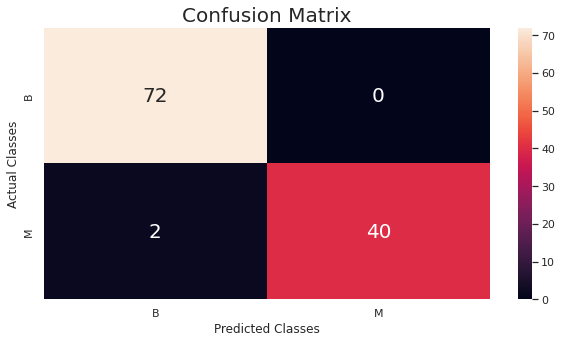

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, svc_pred)
cm_dataframe = pd.DataFrame(cm, columns=list(label_encoder.classes_), index=list(label_encoder.classes_))

plt.figure(figsize = (10,5));
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":20});
p.set_title('Confusion Matrix', fontsize=20);
p.set_xlabel('Predicted Classes');
p.set_ylabel('Actual Classes');

Text(0.5, 0, 'False Positive Rate')

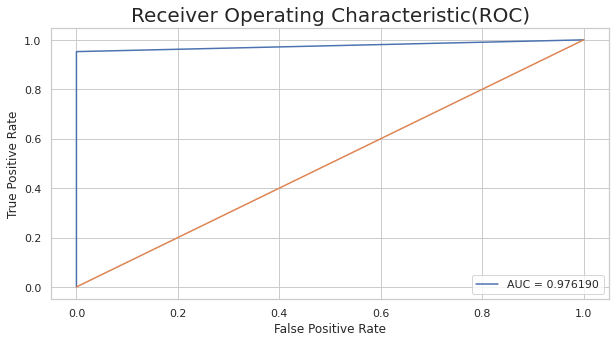

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, svc_pred)
auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,5))
plt.plot(false_positive_rate, true_positive_rate, label="AUC = {:2f}".format(auc))
plt.plot([0,1], [0,1])
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC)", fontsize=20)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## Conclusion

In this notebook, we explored a breast cancer classification problem using machine learning techniques. We began by preprocessing and exploring the dataset, visualizing the data distribution, and calculating important statistics. We then scaled the features and encoded the target variable for modeling.

Several machine learning models, including Decision Trees, Logistic Regression, Naive Bayes, Support Vector Classifier, Random Forest, k-Nearest Neighbors, Stochastic Gradient Descent, and Gradient Boosting, were trained and evaluated. The models were assessed using accuracy scores and cross-validation techniques to ensure their robustness.

Our hyperparameter-tuned Support Vector Classifier (SVC) stood out as the top-performing model, achieving an accuracy score of 98.25%. Additionally, we thoroughly examined the model's precision, recall, and F1-scores, providing a detailed assessment of its classification capabilities.

The classification report, confusion matrix, and Receiver Operating Characteristic (ROC) curve further reinforced the SVC model's ability to effectively distinguish between malignant and benign breast cancer cases.

This project demonstrates the power of machine learning in the early detection and classification of breast cancer, potentially assisting medical professionals in making more accurate diagnoses.

Thank you for exploring this notebook, and we hope it serves as a valuable resource for understanding breast cancer classification using machine learning techniques.